# Ultimate Technology Take Home Challenge

## Part 1 - EDA

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
# Importing the Packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime
import seaborn as sns

In [2]:
# Loading the Data
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Aggregating the Logining Counts: 15 min
logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins.sort_index(inplace=True)
logins = logins.resample("15min").sum()

In [6]:
logins['time'] = pd.to_datetime(logins.index)

In [7]:
# Creating variables for analysis
logins['month'] = logins.time.dt.month
logins['day'] = logins.time.dt.day
logins['hour'] = logins.time.dt.hour
logins['week'] = logins.time.dt.week
logins['weekday'] = logins.time.dt.weekday

In [8]:
# The data goes from January 1, 1970 to April 13, 2020
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   count    9788 non-null   int64         
 1   time     9788 non-null   datetime64[ns]
 2   month    9788 non-null   int64         
 3   day      9788 non-null   int64         
 4   hour     9788 non-null   int64         
 5   week     9788 non-null   int64         
 6   weekday  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 611.8 KB


In [9]:
logins.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,20,1,3
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,21,1,3


It is important to look at all of the trends of the data.

## Monthly

In [10]:
# Analysis of Montly data
logins_month = logins.groupby('month')['count'].sum()
logins_month

month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

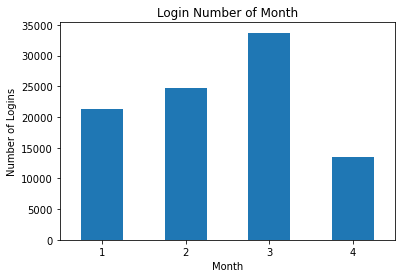

In [11]:
logins_month.plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of Logins")
plt.xticks(rotation=0)

There an increase in number of logins from January to March. This means that the demand for the product is increasing month by month. We do have to keeep in mind that the months have different number of days. It is still a good sign that March has the highest number of logins. We only have 13 days of April in our analysis so I would wait until April is over to conduct further analysis.

## Weekly

In [12]:
# Analysis of Weekly data
logins_week =logins.groupby('week')['count'].sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

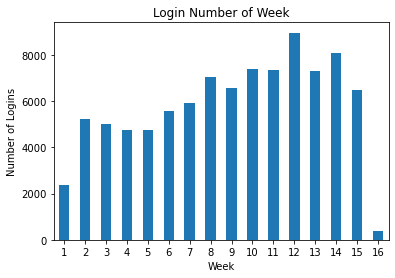

In [13]:
logins_week.plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of Logins")
plt.xticks(rotation=0)

We can see there that there was a increase in number of logins from the 1st week to the 12th week. We will have to look at more week to conclude wheter it is an upward trend or downward trend from week 12 and onward.

## Weekday

In [14]:
# Analysis of Weekday data
import calendar
nweek = 16   # total weeks
logins_weekday = logins.groupby('weekday')['count'].aggregate(np.sum)/nweek
logins_weekday

weekday
0     551.4375
1     579.2500
2     646.1875
3     747.5000
4     950.5000
5    1211.0625
6    1135.4375
Name: count, dtype: float64

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

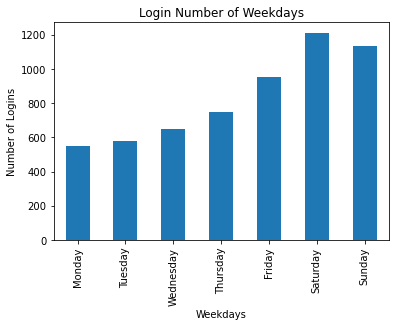

In [15]:
ax = logins_weekday.plot(kind='bar')
plt.title("Login Number of Weekdays")
plt.xlabel("Weekdays")
plt.ylabel("Number of Logins")
plt.xticks(rotation=90)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

In [16]:
logins_day = logins.resample('D').sum()
logins_day.head()

,count,month,day,hour,week,weekday
login_time,,,,,,
1970-01-01,112,16,16,344,16,48
1970-01-02,681,96,192,1104,96,384
1970-01-03,793,96,288,1104,96,480
1970-01-04,788,96,384,1104,96,576
1970-01-05,459,96,480,1104,192,0


In [17]:
logins_day['date'] = pd.to_datetime(logins_day.index)
logins_day['weekday'] = logins_day.date.dt.weekday
logins.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,20,1,3
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,21,1,3


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

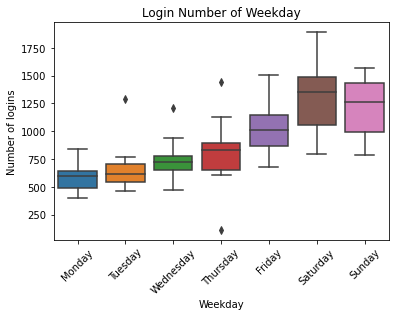

In [18]:
ax = sns.boxplot(x='weekday', y='count', data=logins_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Saturday has the great average number of logins. The variance was greatest on Saturdays. There were outliers on Tuesdays, Wendsday and Thursday

## Hourly

In [19]:
# Analysis of Hourly Data
logins_hour = logins.resample('H').sum()
logins_hour.head()

,count,month,day,hour,week,weekday
login_time,,,,,,
1970-01-01 20:00:00,24,4,4,80,4,12
1970-01-01 21:00:00,9,4,4,84,4,12
1970-01-01 22:00:00,21,4,4,88,4,12
1970-01-01 23:00:00,58,4,4,92,4,12
1970-01-02 00:00:00,53,4,8,0,4,16


In [20]:
logins_hour['time'] = pd.to_datetime(logins_hour.index)
logins_hour['hour'] = logins_hour.time.dt.hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

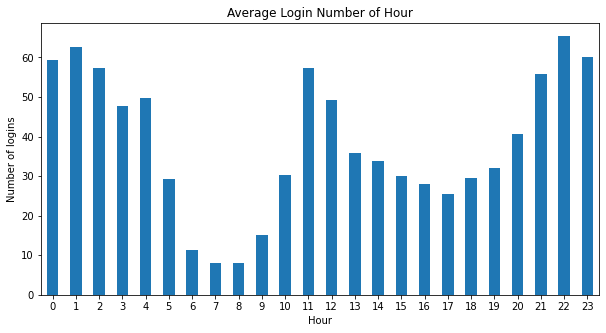

In [21]:
n_day = 30+28+30+13  
(logins.groupby('hour')['count'].sum()/n_day).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

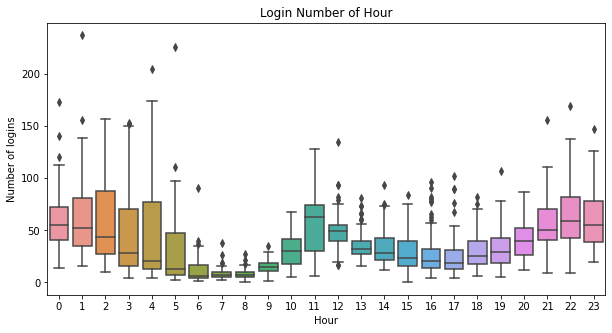

In [22]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='count', data=logins_hour)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

It seems like midnight and noon is where we see the greatest number of logins.

### EDA Conclusion

* Weekend are busier than the weekdays on average.
* Increase in logins from January to March on average.
* Most logins happen during noon and midnight on average.

# Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key measure of success for the experiment will be the increase in the total toll cost reimburstment. The rise in total toll cost reimburstment will mean that the driver partners are moving in between cities more. 

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
* a) how you will implement the experiment
* b) what statistical test(s) you will conduct to verify the significance of the
observation
* c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
* Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.

* a) The implementation the experiment will be started by choosing a sample randomly in both of the cities. I will then split the people in the sample into two group. The people who get reimburstment and people who do not get reimburstment. I will track the data of the toll cost reimburstment of the two groups.
* b) I will use t-test to verify the significance of the observation between the people who got reimburstment vs. the people do did not get reimburstment.
* c) The interpretation of the results and recommendations will depend of the results of the test. If it is signification, I would look at the percetange change in the total cost reimburstment and other factor for my recommendation. The increase in toll cost reimburstment will signify that there is an increase partnered drivers moving across cities. I would then create a presentation to the city operations team. I will also have to ask the city operations team questions like "Is the increase in toll cost reimburstment worth it?", "There was an increase in partners driving in both cities, but at what cost.", etc.

# Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
* 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
* 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
* 3. Briefly discuss how Ultimate might leverage the insights gained from the model toimprove its long term rider retention (again, a few sentences will suffice).

**Data description**
* ● **city:** city this user signed up in
* ● **phone:** primary device for this user
* ● **signup_date:** date of account registration; in the form ‘YYYYMMDD’
* ● **last_trip_date:** the last time this user completed a trip; in the form ‘YYYYMMDD’
* ● **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup
* ● **avg_rating_by_driver:** the rider’s average rating over all of their trips
* ● **avg_rating_of_driver:** the rider’s average rating of their drivers over all of their trips
* ● **surge_pct:** the percent of trips taken with surge multiplier > 1
* ● **avg_surge:** The average surge multiplier over all of this user’s trips
* ● **trips_in_first_30_days:** the number of trips this user took in the first 30 days after signing up
* ● **ultimate_black_user:** TRUE if the user took an Ultimate Black in their first 30 days; FALSE
otherwise
* ● **weekday_pct:** the percent of the user’s trips occurring during a weekday

#### Date Wrangling

In [23]:
#import data from json file
import json 

file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

In [24]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [26]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [27]:
# Looking at the data of the missing columns
print(df['avg_rating_of_driver'].head()) 
print(df['avg_rating_by_driver'].head())
print(df['phone'].head())

0    4.7
1    5.0
2    4.3
3    4.6
4    4.4
Name: avg_rating_of_driver, dtype: float64
0    5.0
1    5.0
2    5.0
3    4.9
4    4.9
Name: avg_rating_by_driver, dtype: float64
0     iPhone
1    Android
2     iPhone
3     iPhone
4    Android
Name: phone, dtype: object


In [28]:
# filling missing data with the mean
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [29]:
df = df.reset_index(drop=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [31]:
df.last_trip_date = pd.to_datetime(df['last_trip_date'])
df.signup_date = pd.to_datetime(df['signup_date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

#### EDA

In [33]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [34]:
numerical_variable = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

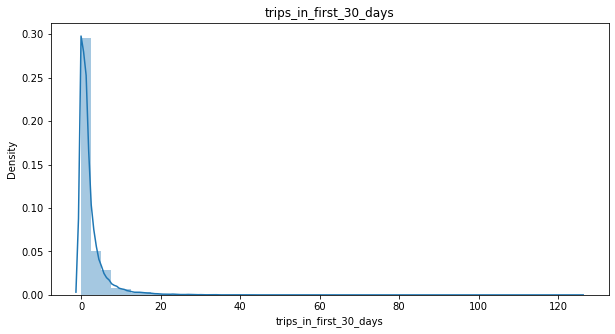

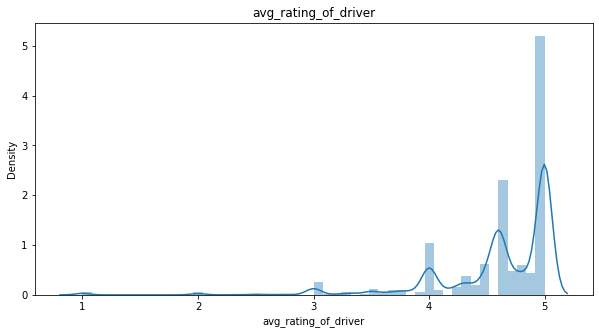

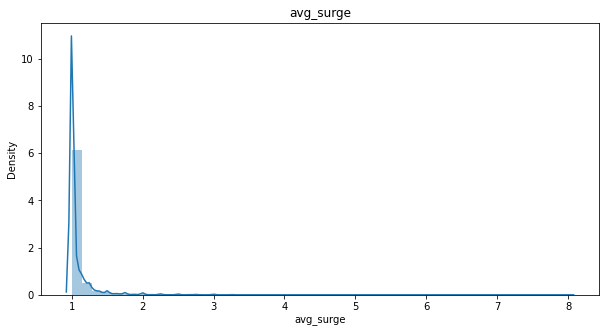

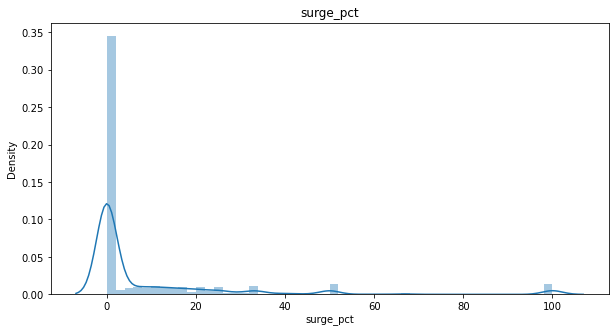

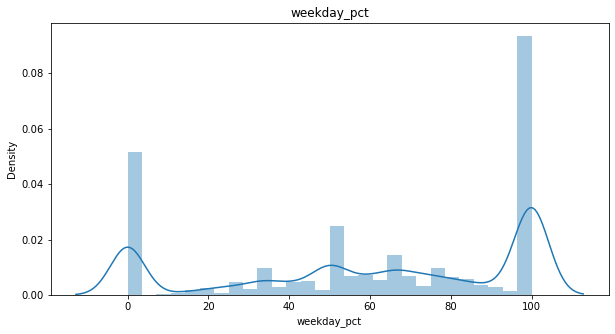

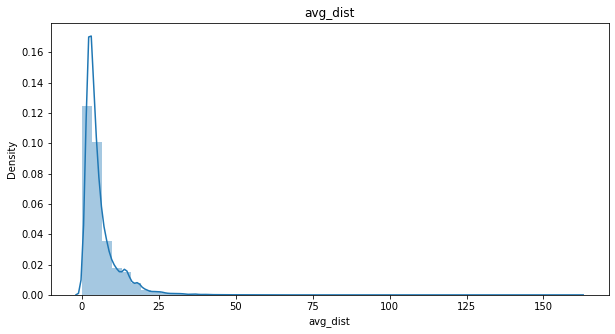

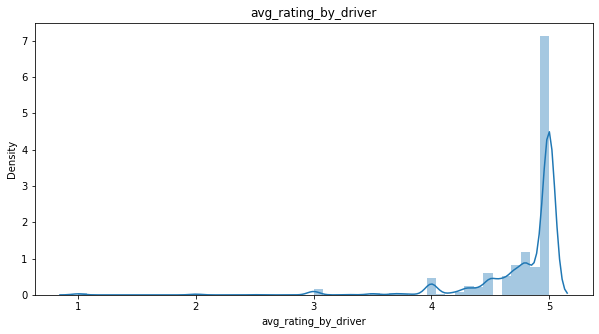

In [35]:
# Looking at the distribution of the numerical variables
for i in numerical_variable:
    sns.distplot(df[i])
    plt.title(i)
    plt.show();

In [36]:
categorical_variable = ['city','phone', 'ultimate_black_user']

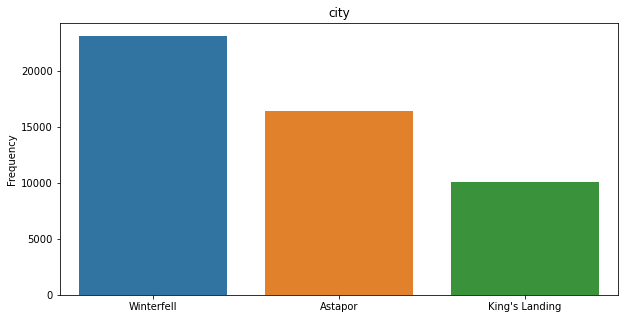

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


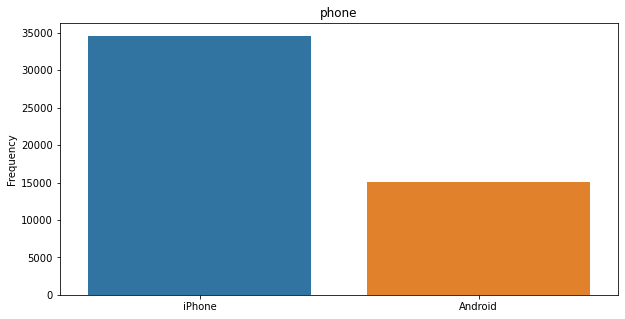

iPhone     34582
Android    15022
Name: phone, dtype: int64


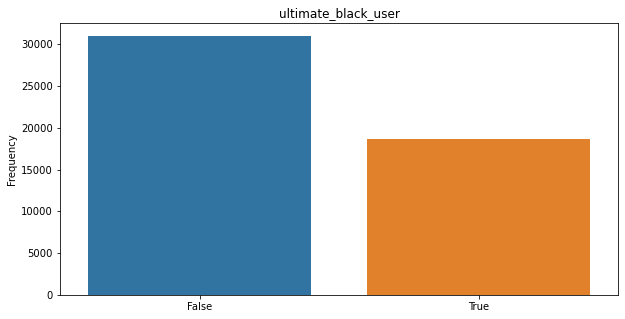

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [37]:
# Looking at the distribution of the categorical variables
for i in categorical_variable:
    sns.barplot(x = list(df[i].value_counts().index), y = df[i].value_counts())
    plt.title(i)
    plt.ylabel('Frequency')
    plt.show()
    print(df[i].value_counts())

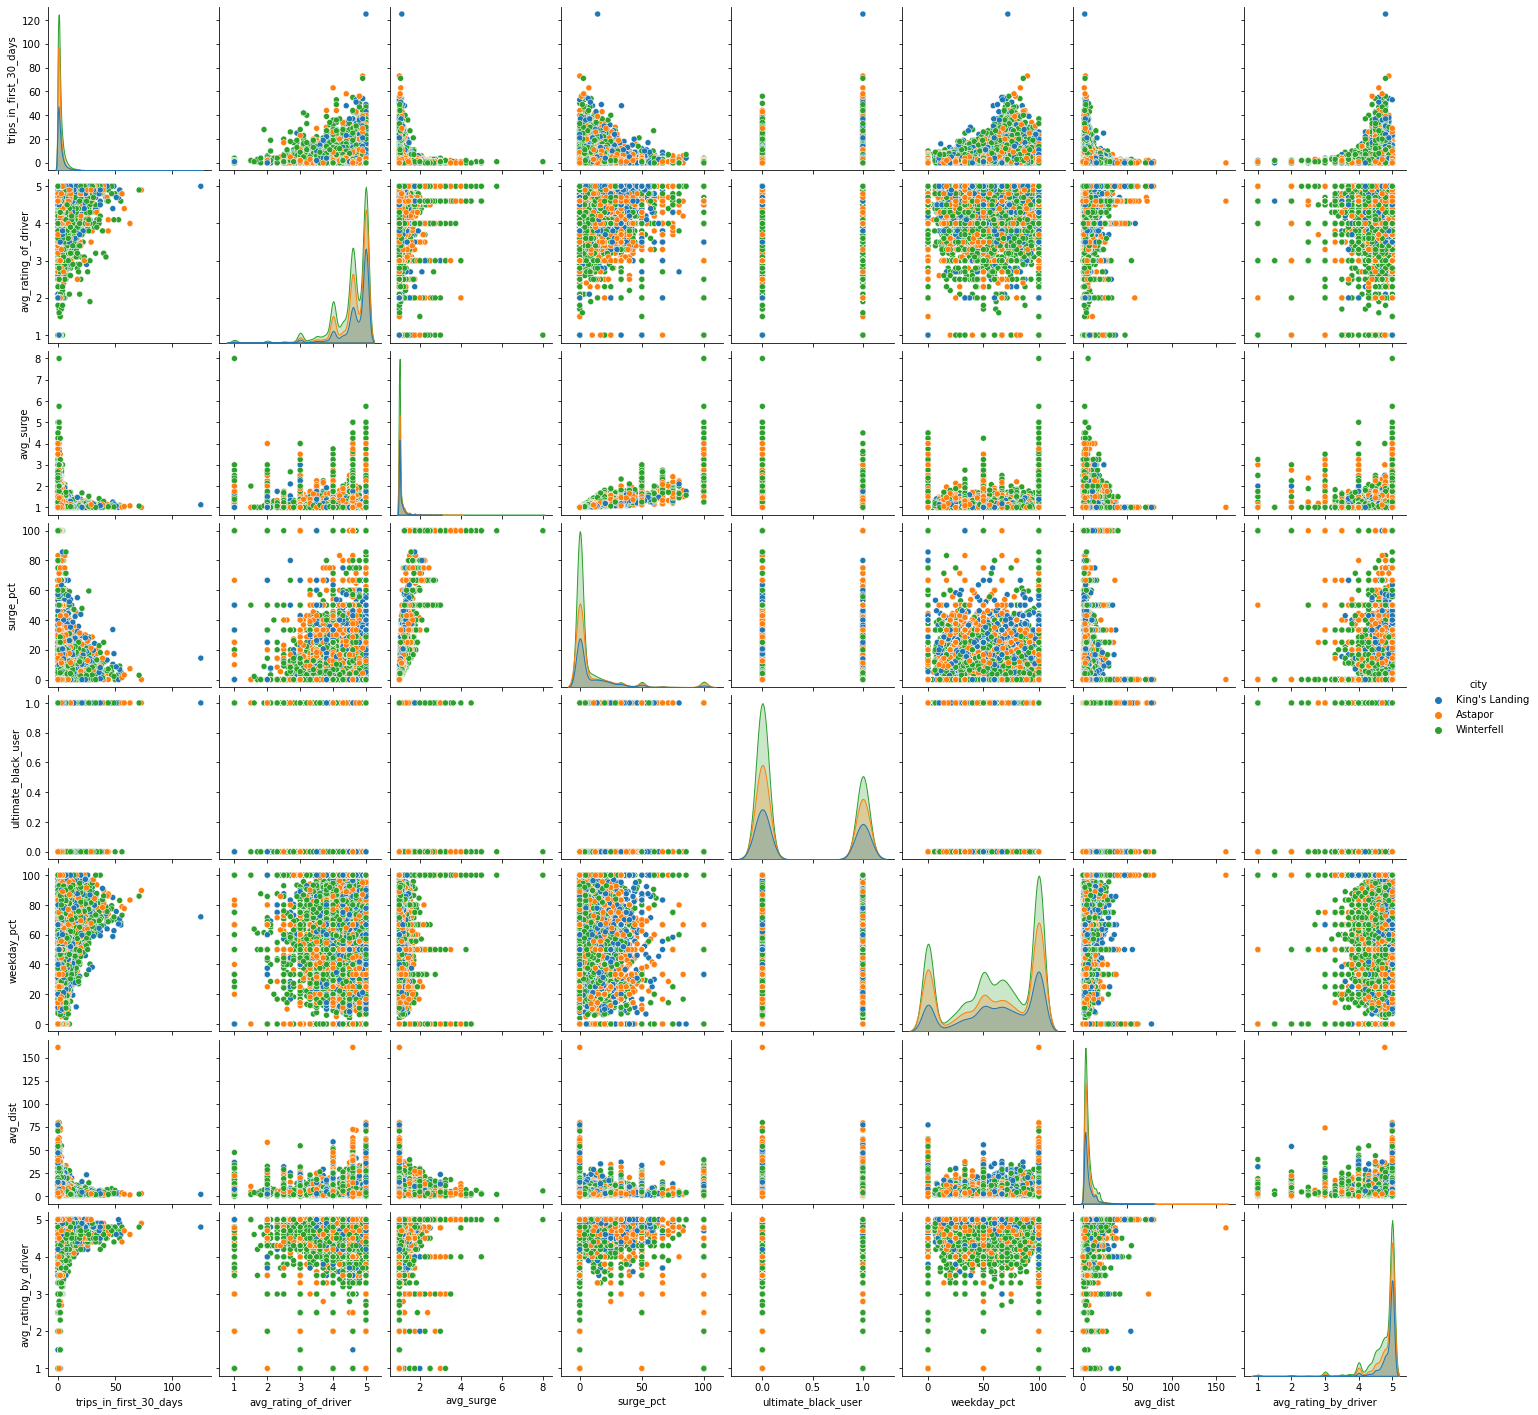

In [38]:
# Looking that pair to compare
sns.pairplot(df, hue='city')

In [39]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [40]:
retained = (df['last_trip_date'] > '2014-06-01')*1

In [41]:
# The fraction of the users that were retained
fraction_retained = (retained.sum()/len(df)).round(4)
print('Fraction of the observed users were retained: {}'.format(fraction_retained))

Fraction of the observed users were retained: 0.3665


In [42]:
df['retained_user'] = retained 

In [43]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


### Preprocessing and Modeling

In [44]:
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [45]:
# Creating dummy variables for categorical features
dummy_df = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [46]:
dummy_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained_user,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,0,0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dummy_df)

In [49]:
X = dummy_df.drop('retained_user', axis=1)
y = dummy_df['retained_user']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


In [51]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
clf_params = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

grid_clf = GridSearchCV(RandomForestClassifier(), clf_params)
grid_clf.fit(X_train, y_train)
y_pred_gclf = grid_clf.predict(X_test)
test_gclf = accuracy_score(y_pred_gclf, y_test)


print("Tuned CLF Parameter: {}".format(grid_clf.best_params_))
print("Best score is {}".format(grid_clf.best_score_))

Tuned CLF Parameter: {'max_features': 10, 'n_estimators': 200, 'oob_score': True}
Best score is 0.7648112708141127


In [52]:
# DecisionTree Classifier
# Creating the hyperparameter grid
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# Modeling
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
y_pred_gct = grid_tree.predict(X_test)
test_dtc = accuracy_score(y_pred_gct, y_test)

# Printing out the Accuracy and the confusion matrix
print("Tuned DecisionTree Parameters: {}".format(grid_tree.best_params_)) 
print("Best score is {}".format(grid_tree.best_score_))

Tuned DecisionTree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Best score is 0.7435930908271591


In [53]:
# Logistic regression
# Creating the hyperparameter grid
c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Modeling
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
y_pred = logreg_cv.predict(X_test)
test_lr = accuracy_score(y_pred, y_test)

# Printing out scores
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 100, 'penalty': 'l2'}
Best score is 0.7253736709856248


#### Best Model

We tried 3 different classification model and Random Forest Classifer came up on top. Random forest uses many decision tree models and the final prediction is made based on the average of those independent decision tree predictions. This ensures that there is no bias in the model as there is no particular segment of data or a set of features that dominates the prediction results.

* [Random Forest](https://towardsdatascience.com/random-forest-in-simple-english-why-is-it-so-popular-3ba04d0374d)

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
best_model = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [57]:
# Generate classification report
print(classification_report(y_test, y_pred))
print("Accuracy is {}".format(test_gclf))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      6347
           1       0.69      0.65      0.67      3574

    accuracy                           0.77      9921
   macro avg       0.75      0.74      0.75      9921
weighted avg       0.77      0.77      0.77      9921

Accuracy is 0.7737123273863522


Text(0.5, 1.0, 'ROC Curve')

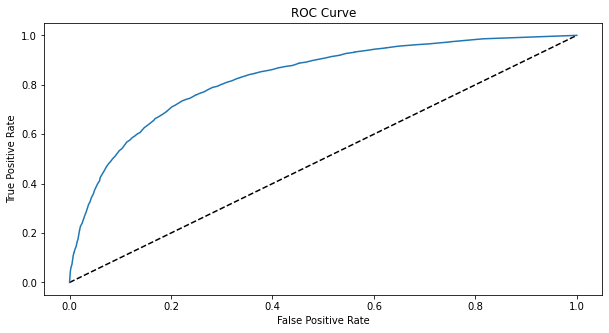

In [58]:
# Compute predicted probabilities
y_pred_prob = best_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [59]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8294


In [61]:
important_variables = pd.DataFrame(list(zip(X.columns, best_model.feature_importances_)), columns = ['features', 'Importance'])
important_variables.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
5,avg_dist,0.297829
6,avg_rating_by_driver,0.146002
4,weekday_pct,0.114465
3,surge_pct,0.094409
1,avg_rating_of_driver,0.080616


The most important feature are avg_dist, avg_rating_by_driver, weekday_pct.

### Conclusion

As stated before the most important feature in determining retention is avg_dist, avg_rating_by_driver, week_pct:

* ● **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup
* ● **avg_rating_by_driver:** the rider’s average rating over all of their trips
* ● **weekday_pct:** the percent of the user’s trips occurring during a weekday

The reccomendation I will give is that Ultimate's team should find a way to increase the 3 features that most contribution to retention. 